In [174]:
import pandas as pd
import os
import re
import PubMedHandler as pmh
import utils
import importlib
importlib.reload(utils)

<module 'utils' from 'C:\\Users\\Mohsen\\Dropbox\\Univertsity\\PHD_Research\\Papers\\Semantic Relation Extraction\\DataSets\\Annotated-Semantic-Relationships-Datasets\\datasets\\Important\\utils.py'>

In [175]:
database_location = 'ADE/data/ADE-Corpus-V2'

In [176]:
table = 'DRUG-AE.rel'

Column_names = ['PubMed-ID','Sentence','Adverse-Effect','Start_Offset_AE','End_Offset_AE','Drug',
                'Start_Offset_Drug','End_Offset_Drug']

Drug_AE = pd.read_csv(os.path.join(database_location,table) , sep='|', header=None, 
                     names= Column_names , index_col=False)

Drug_AE.head()

,PubMed-ID,Sentence,Adverse-Effect,Start_Offset_AE,End_Offset_AE,Drug,Start_Offset_Drug,End_Offset_Drug
0,10030778,Intravenous azithromycin-induced ototoxicity.,ototoxicity,43,54,azithromycin,22,34
1,10048291,"Immobilization, while Paget's bone disease was...",increased calcium-release,960,985,dihydrotachysterol,908,926
2,10048291,Unaccountable severe hypercalcemia in a patien...,hypercalcemia,31,44,dihydrotachysterol,94,112
3,10082597,METHODS: We report two cases of pseudoporphyri...,pseudoporphyria,620,635,naproxen,646,654
4,10082597,METHODS: We report two cases of pseudoporphyri...,pseudoporphyria,620,635,oxaprozin,659,668


In [177]:
np_Drug_AE = Drug_AE.to_numpy()

In [178]:
table = 'DRUG-DOSE.rel'
Column_names = ['PubMed-ID','Sentence','Dose','Start_Offset_AE','End_Offset_AE','Drug',
                'Start_Offset_Drug','End_Offset_Drug']
Drug_Dose = pd.read_csv(os.path.join(database_location,table) , sep='|', header=None, 
                     names= Column_names , index_col=False)
Drug_Dose.head()

,PubMed-ID,Sentence,Dose,Start_Offset_AE,End_Offset_AE,Drug,Start_Offset_Drug,End_Offset_Drug
0,10327035,An episode of subacute encephalopathy after th...,1500 mg/m2,230,240,methotrexate,216,228
1,10452772,She continued to receive regular insulin 4 tim...,4 times per day,1473,1488,insulin,1465,1472
2,10458196,A 5-month-old infant became lethargic and poor...,1 drop,522,528,brimonidine,532,543
3,10667036,The presented patient was treated with 200 mg ...,200 mg,389,395,TCA,396,399
4,10698143,Central nervous system manifestations of an ib...,overdose,64,72,ibuprofen,54,63


In [179]:
np_Drug_Dose = Drug_Dose.to_numpy()

In [180]:
table = 'ADE-NEG.txt'
Column_names = ['PubMed-ID','Sentence']
f = open(os.path.join(database_location,table) , 'r')
neg_sentences = []
for l in f:
    pubmed_id , sentence = l.split('NEG')
    neg_sentences.append([pubmed_id.strip(), sentence.strip()])
ADE_NEG = pd.DataFrame(columns=Column_names , data=neg_sentences)
ADE_NEG.head()

,PubMed-ID,Sentence
0,6460590,Clioquinol intoxication occurring in the treat...
1,8600337,"""Retinoic acid syndrome"" was prevented with sh..."
2,8402502,BACKGROUND: External beam radiation therapy of...
3,8700794,"Although the enuresis ceased, she developed th..."
4,17662448,A 42-year-old woman had uneventful bilateral l...


# Uncomment this section if you want to collect the abstract from PubMed website

In [ ]:
# pmc = pmh.Collect()

# n = len(np_Drug_AE)

# Unique_Pubid = {0}
# for i in range(n):
#     if np_Drug_AE[i][0] not in Unique_Pubid:
#         pmc.getabstract(str(np_Drug_AE[i][0]))
#         Unique_Pubid.update([np_Drug_AE[i][0]])
#     print("%d   /%d     Unique PubId Proccessed : %d   "%(i+1 , n , len(Unique_Pubid)-1 ) , end = '\r')

# pmc.to_csv('Drug_AE.csv','Metadata_Drug_AE.csv')

# we run this for drug Dose to make sure all the abstracts are avaiable

In [40]:
# pmc = pmh.Collect()

# n = len(np_Drug_Dose)

# Unique_Pubid = {0}
# for i in range(n):
#     if np_Drug_Dose[i][0] not in Unique_Pubid:
#         pmc.getabstract(str(np_Drug_Dose[i][0]))
#         Unique_Pubid.update([np_Drug_Dose[i][0]])
#     print("%d   /%d     Unique PubId Proccessed : %d   "%(i+1 , n , len(Unique_Pubid)-1 ) , end = '\r')

# pmc.to_csv('Drug_Dose.csv','Metadata_Drug_Dose.csv')

In [182]:
Abstracts = None
if os.path.exists('Drug_AE.csv'):
    Abstracts = pd.read_csv('Drug_AE.csv')
    print('Abstracts is loaded')
else:
    print('To create the Drug_AE un comment the code above and let it run to crate the file for you')

Abstracts is loaded


In [183]:
Abstracts.head()

,Unnamed: 0,pubmedID,ArticleTitle,AbstractText,PubYear,PubMonth
0,0,10030778,Intravenous azithromycin-induced ototoxicity.,Intravenous azithromycin is increasingly admin...,1999,2
1,3,10048291,Unaccountable severe hypercalcemia in a patien...,This report describes a forty-seven-year-old f...,1999,1
2,4,10082597,Pseudoporphyria induced by propionic acid deri...,Pseudoporphyria is a photosensitive bullous sk...,1999,1
3,5,10084639,Olanzapine treatment after clozapine-induced g...,How to best treat psychotic patients who have ...,1999,2
4,6,10099659,Prolonged severe 5-fluorouracil-associated neu...,5-Fluorouracil (5-FU) is an analogue of pyrimi...,1999,0


In [185]:
Abstracts_np = Abstracts.to_numpy()
#sample add the Title and Abstract
Abstracts_np[0][2] + ' ' + Abstracts_np[0][3]

'Intravenous azithromycin-induced ototoxicity. Intravenous azithromycin is increasingly administered for treatment of hospitalized patients with community-acquired pneumonia. Macrolide antibiotics cause ototoxicity, which occurs most frequently when high serum concentrations are achieved. Current dosing guidelines for intravenous azithromycin can result in much higher serum concentrations than is seen with oral administration. We describe a 47-year-old woman who developed complete deafness after receiving 8 days of intravenous azithromycin.'

In [186]:
len(Abstracts_np)

1642

### Structure of Sentences
### pubmed_id , sentence , drug , effect 
### {'id': '', 'docid': '', 'relation': '', 
### 'token': [], 
### 'subj_start': -1, 
### 'subj_end': -1, 
### 'obj_start': -1, 
### 'obj_end': -1, 
###  'subj_type': '', 
### 'subj_positions' :[],
### 'obj_type': '', 
### 'obj_positions' : [],
###  'pos': [], 
###  'ner': []
### }

In [187]:
def get_relation(pubmedid , sentence , source):
    """
    Returns:
        subject : Drug , Object : Adverse Effect
    """
    Relations = source[(source['PubMed-ID'] == pubmedid)]
    # Structure of DRUG_AE
    #PubMed-ID(0)
    #Sentence(1)
    #Adverse-Effect(2)	Start_Offset_AE(3)	End_Offset_AE(4) # start and end is wrong 
    #Drug(5)	Start_Offset_Drug(6)	End_Offset_Drug(7) # start and end is wrong
    Relations_np = Relations.to_numpy()
    try:
        for i in range(len(Relations_np)):
            tokens = utils.tokenize(sentence)
            if sentence == utils.transform(Relations_np[i][1])[0]:
                Drug_tokenize = utils.tokenize(utils.transform(Relations_np[i][5])[0])
                AE_tokenize = utils.tokenize(utils.transform(Relations_np[i][2])[0])
                subj_start , subj_end = -1, -1
                if len(Drug_tokenize) == 2:
                    subj_start = tokens.index(Drug_tokenize[0])
                    subj_end = subj_start
                else:
                    subj_start = tokens.index(Drug_tokenize[0])
                    subj_end = tokens.index(Drug_tokenize[-2])
                obj_start , obj_end = -1, -1
                if len(AE_tokenize) == 2:
                    obj_start = tokens.index(AE_tokenize[0])
                    obj_end = obj_start
                else:
                    obj_start = tokens.index(AE_tokenize[0])
                    obj_end = tokens.index(AE_tokenize[-2])

                # Drug , Adverse Effect
                return Relations_np[i][5] , subj_start , subj_end, Relations_np[i][2] , obj_start , obj_end
    except Exception as e:
        print(pubmedid , sentence , e)
    return None,-1,-1,None,-1,-1

In [188]:
def get_neg_relation(pubmedid, sentence):
    Relations = ADE_NEG[ADE_NEG['PubMed-ID'] == str(pubmedid)]
    Relations_np = Relations.to_numpy()
    for i in range(len(Relations_np)):
        if sentence == utils.transform(Relations_np[i][1])[0]:
            return 'no_drug_related'
    return None

In [189]:
def getNer(tokens , subj , obj , subj_start, subj_end,obj_start,obj_end):
    ner = ['o']*len(tokens)
    for i in range(subj_start,subj_end+1):
        ner[i] = 'subj-'+subj
    for i in range(obj_start,obj_end+1):
        ner[i] = 'obj-'+obj
    return ner

In [190]:
def get_positions(start_idx, end_idx, length):
    """ Get subj/obj position sequence. """
    return list(range(-start_idx, 0)) + [0]*(end_idx - start_idx + 1) + \
            list(range(1, length-end_idx))

In [191]:
import handlers as hl
import importlib
importlib.reload(hl)

<module 'handlers' from 'C:\\Users\\Mohsen\\Dropbox\\Univertsity\\PHD_Research\\Papers\\Semantic Relation Extraction\\DataSets\\Annotated-Semantic-Relationships-Datasets\\datasets\\Important\\handlers.py'>

### Test the POS model is working correctly

In [192]:
mhl = hl.ModelHandler('load',None)
pos_res = mhl.load_model_predict_text('rnn_single_crf',
                      'POS/model',
                      'this is test',verbos = False)

pos_res.y1

[['dt', 'vbz', 'jj']]

In [193]:
def Pos(sentence):
    mhl = hl.ModelHandler('load',None)
    pos_res = mhl.load_model_predict_text('rnn_single_crf',
                          'POS/model',
                          sentence,verbos = False)
    return pos_res.y1

In [194]:
Sentences = []
# we need to access the dataframe of Drug_AE
# make sure the Cell 5 it hase been executed
Count_Dose , Count_AE, Count_NEG  = 0, 0, 0
docs_relations = dict()
for i in range(len(Abstracts_np)):
    pubmed_id = Abstracts_np[i][1]
    docs_relations[pubmed_id]  = {'NEG' : 0 , 'AE' : 0 , 'Dose' : 0 }
    text = Abstracts_np[i][2] + '\n' + Abstracts_np[i][3]
    sentences = utils.transform(text)
    for j,s in enumerate(sentences):
        tokens = utils.tokenize(s)
        pos_s = Pos(s)
        drug , subj_start,subj_end , AE, obj_start, obj_end = get_relation(pubmed_id , s, Drug_AE)
        if AE:
            Count_AE +=1
            docs_relations[pubmed_id]['AE'] +=1
            print('AE :%d    Dose :%d   NEG: %d '%(Count_AE,Count_Dose,Count_NEG) , end = '\r')
            ner = getNer(tokens,'drug','AE',subj_start , subj_end , obj_start,obj_end)
            l = len(tokens)
            subj_positions = get_positions(subj_start, subj_end, l)
            obj_positions = get_positions(obj_start, obj_end, l)
            json_sentence = {'id': str(pubmed_id) + "_" + str(j), 
                         'docid': pubmed_id, 
                         'relation': AE ,
                         'sentence' : s,
                         'token': tokens, 
                         'subj_start': subj_start, 
                         'subj_end': subj_end, 
                         'obj_start': obj_start, 
                         'obj_end': obj_end, 
                         'subj_type': 'Drug:' + drug if drug else '',
                         'subj_positions' :subj_positions ,
                         'obj_type': 'AE', 
                         'obj_positions' : obj_positions,
                         'pos': pos_s[0], 
                         'ner': ner}
            Sentences.append(json_sentence)
        drug , subj_start,subj_end , Dose, obj_start, obj_end = get_relation(pubmed_id , s, Drug_Dose)
        if Dose:
            Count_Dose +=1
            docs_relations[pubmed_id]['Dose'] +=1
            print('AE :%d    Dose :%d   NEG: %d '%(Count_AE,Count_Dose,Count_NEG) , end = '\r')
            ner = getNer(tokens,'drug','Dose',subj_start , subj_end , obj_start,obj_end)
            l = len(tokens)
            subj_positions = get_positions(subj_start, subj_end, l)
            obj_positions = get_positions(obj_start, obj_end, l)
            json_sentence = {'id': str(pubmed_id) + "_" + str(j), 
                         'docid': pubmed_id, 
                         'relation': Dose,
                         'sentence' : s,
                         'token': tokens, 
                         'subj_start': subj_start, 
                         'subj_end': subj_end, 
                         'obj_start': obj_start, 
                         'obj_end': obj_end, 
                         'subj_type': 'Drug:' + drug if drug else '', 
                         'subj_positions' :subj_positions ,
                         'obj_type': 'Dose',
                         'obj_positions' : obj_positions,
                         'pos': pos_s[0], 
                         'ner': ner}
            Sentences.append(json_sentence)
        if not Dose and not AE:
            if get_neg_relation(pubmed_id,s):
                Count_NEG+=1
                docs_relations[pubmed_id]['NEG'] +=1
                print('AE :%d    Dose :%d   NEG: %d '%(Count_AE,Count_Dose,Count_NEG) , end = '\r')
                json_sentence = {'id': str(pubmed_id) + "_" + str(j), 
                         'docid': pubmed_id, 
                         'relation': 'NEG',
                         'sentence' : s,
                         'token': tokens, 
                         'subj_start': -1, 
                         'subj_end': -1, 
                         'obj_start': -1, 
                         'obj_end': -1, 
                         'subj_type': '', 
                         'subj_positions' :[] ,
                         'obj_type': '',
                         'obj_positions' : [],
                         'pos': pos_s[0], 
                         'ner': ['o']*len(tokens)}
                Sentences.append(json_sentence)

14684937 iatrogenic hypercalcemia due to vitamin d3 ointment ( 1 ,  24 (  oh ) 2d3 ) combined with thiazide diuretics in a case of psoriasis .  '1,24' is not in list
16623611 the patient was enrolled in a weight - loss clinic , and his diabetes medications were adjusted .  'olanzapine' is not in list
19299370 according to the naranjo et al .  'enoxaparin' is not in list
7781845 we report a case of hypoglycaemia after mefloquine therapy ( 1 ,  500 mg over two days ) for severe gastrointestinal cryptosporidiasis in a cachectic aids patient with protracted diarrhoea .  '1,500' is not in list


In [195]:
len(Sentences)

10618

In [196]:
Sentences[1]

{'id': '10030778_1',
 'docid': 10030778,
 'relation': 'NEG',
 'sentence': 'intravenous azithromycin is increasingly administered for treatment of hospitalized patients with community - acquired pneumonia . ',
 'token': ['intravenous',
  'azithromycin',
  'is',
  'increasingly',
  'administered',
  'for',
  'treatment',
  'of',
  'hospitalized',
  'patients',
  'with',
  'community',
  '-',
  'acquired',
  'pneumonia',
  '.'],
 'subj_start': -1,
 'subj_end': -1,
 'obj_start': -1,
 'obj_end': -1,
 'subj_type': '',
 'subj_positions': [],
 'obj_type': '',
 'obj_positions': [],
 'pos': ['jj',
  'nn',
  'vbz',
  'rb',
  'vbn',
  'in',
  'nn',
  'in',
  'cd',
  'nns',
  'in',
  'rb',
  'prp',
  'vbn',
  'nns',
  '(',
  'nn'],
 'ner': ['o',
  'o',
  'o',
  'o',
  'o',
  'o',
  'o',
  'o',
  'o',
  'o',
  'o',
  'o',
  'o',
  'o',
  'o',
  'o']}

In [197]:
len(docs_relations)

1642

In [198]:
if os.path.exists('docs_relations.csv'):
    docs_relations_df =  pd.read_csv('docs_relations.csv')
    docs_relations_df.set_index('pubmedid',inplace = True)
    print('Docs Relations is loaded')
else:
    docs_relations_df = pd.DataFrame.from_dict(docs_relations , orient='index')
    docs_relations_df.to_csv('docs_relations.csv' , columns= ['pubmedid','NEG','AE','Dose'])
    print('Docs Relations created and saved in docs_relations.csv')

Docs Relations is loaded


In [199]:
docs_relations_df.shape

(1642, 3)

In [200]:
import matplotlib.pyplot as plt
import numpy as np
import random

In [201]:
def draw_chart_get_np(df , column , ax , xlabel , ylabel, tick = None):
    data = [[x,y] for x , y in df[column].value_counts().items()] 
    np_data = np.asarray(data)
    #print(df[column].value_counts())
    ax.bar(np_data[:,0] , np_data[:,1])
    if tick is not None:
        ax.set_xticks(tick)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.grid( ls = '-.', lw = 0.25,axis='y' , zorder = -1)
    return np_data

In [202]:
def split_data(mode , np_data , original_df, columnname  , percentage):
    """
    Send an numpy array of the data to split
    make sure the original dataframe have an eligible index
    """
    curr_random_state = random.randint(1,50)
    splited_data = []
    for i in np_data:
        splited_data.append([i[0] , int(i[1]*percentage)])
        i[1] = i[1] - int(i[1]*percentage)
    splited_df = []
    print('Original size :' , original_df.shape)
    for c in splited_data:
        filtered_df = original_df[original_df[columnname] == c[0]]
        devel = filtered_df.sample(n = c[1], random_state = curr_random_state)
        pubmed_values = devel.index.values.tolist()
        original_df.drop(pubmed_values ,  inplace = True)
        splited_df.append(devel)
    devel = pd.concat(splited_df)
    print(mode + ' size :' , devel.shape)
    print('Original size (after remove) :' , original_df.shape)
    return original_df , devel 

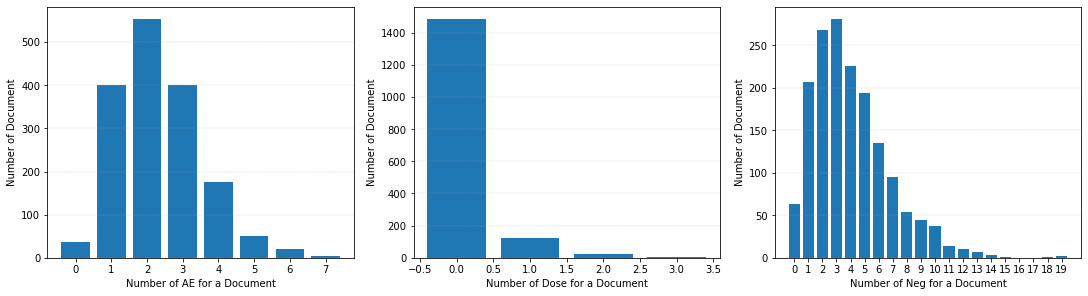

In [203]:
fig , axs = plt.subplots(1,3 , figsize=(15,4) , constrained_layout=True)
np_data_AE   =draw_chart_get_np(docs_relations_df , 'AE' ,axs[0], 'Number of AE for a Document' ,'Number of Document')
np_data_Dose   =draw_chart_get_np(docs_relations_df , 'Dose' ,axs[1] ,'Number of Dose for a Document' ,'Number of Document'  )
np_data_NEG   =draw_chart_get_np(docs_relations_df , 'NEG' , axs[2] ,'Number of Neg for a Document' ,'Number of Document', np.arange(0,20,1))


In [204]:
docs_relations_df , devel_df = split_data('devel' , np_data_AE , docs_relations_df , 'AE' , 0.1)

Original size : (1642, 3)
devel size : (162, 3)
Original size (after remove) : (1480, 3)


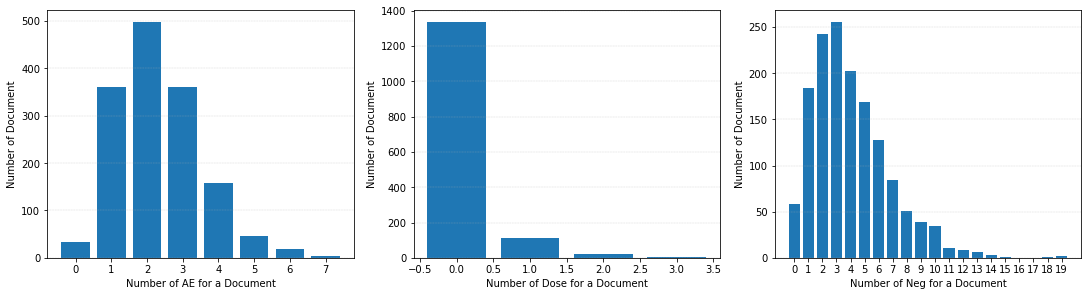

In [205]:
fig , axs = plt.subplots(1,3 , figsize=(15,4) , constrained_layout=True)
np_data_AE   =draw_chart_get_np(docs_relations_df , 'AE' ,axs[0], 'Number of AE for a Document' ,'Number of Document')
np_data_Dose   =draw_chart_get_np(docs_relations_df , 'Dose' ,axs[1] ,'Number of Dose for a Document' ,'Number of Document'  )
np_data_NEG   =draw_chart_get_np(docs_relations_df , 'NEG' , axs[2] ,'Number of Neg for a Document' ,'Number of Document', np.arange(0,20,1))

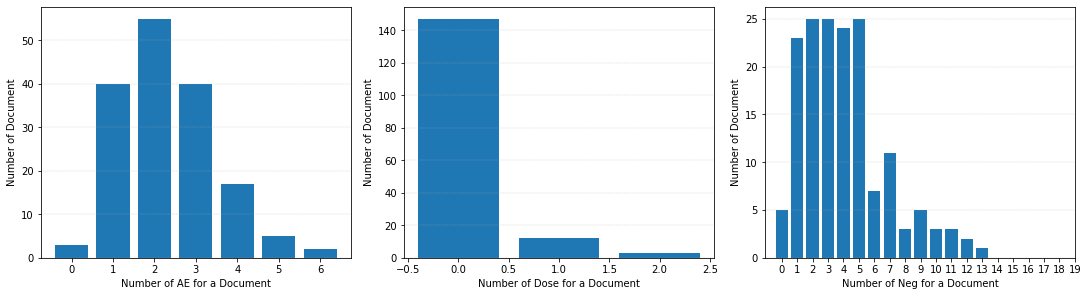

In [206]:
fig , axs = plt.subplots(1,3 , figsize=(15,4) , constrained_layout=True)
_ = draw_chart_get_np(devel_df , 'AE' ,axs[0], 'Number of AE for a Document' ,'Number of Document')
_ = draw_chart_get_np(devel_df , 'Dose' ,axs[1] ,'Number of Dose for a Document' ,'Number of Document'  )
_ = draw_chart_get_np(devel_df , 'NEG' , axs[2] ,'Number of Neg for a Document' ,'Number of Document', np.arange(0,20,1))


In [207]:
docs_relations_df , test_df = split_data('test' , np_data_AE , docs_relations_df , 'AE' , 0.2)

Original size : (1480, 3)
test size : (292, 3)
Original size (after remove) : (1188, 3)


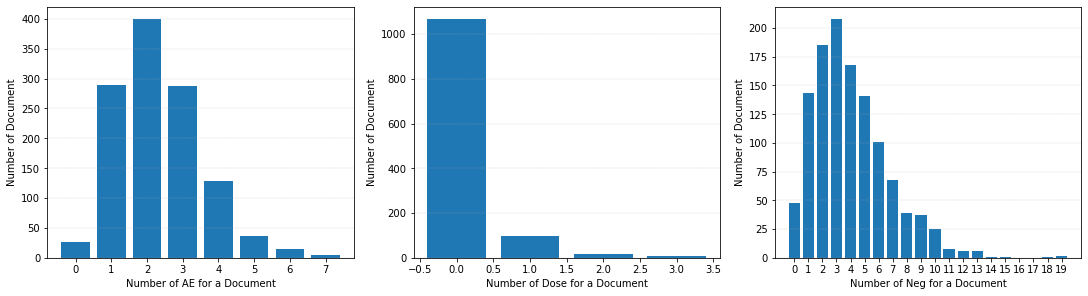

In [208]:
fig , axs = plt.subplots(1,3 , figsize=(15,4) , constrained_layout=True)
np_data_AE   =draw_chart_get_np(docs_relations_df , 'AE' ,axs[0], 'Number of AE for a Document' ,'Number of Document')
np_data_Dose   =draw_chart_get_np(docs_relations_df , 'Dose' ,axs[1] ,'Number of Dose for a Document' ,'Number of Document'  )
np_data_NEG   =draw_chart_get_np(docs_relations_df , 'NEG' , axs[2] ,'Number of Neg for a Document' ,'Number of Document', np.arange(0,20,1))

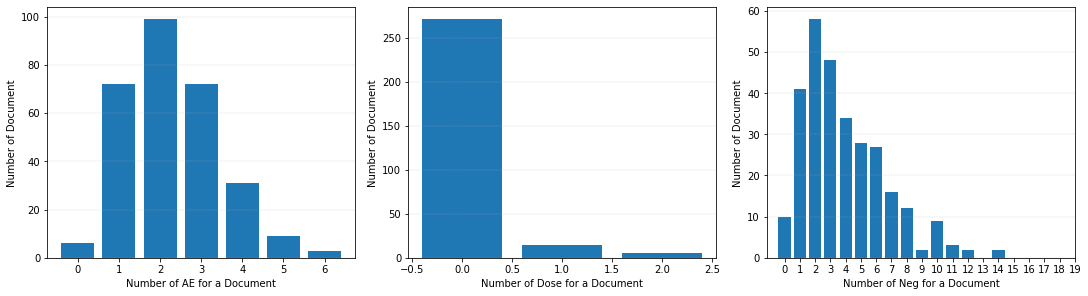

In [209]:
fig , axs = plt.subplots(1,3 , figsize=(15,4) , constrained_layout=True)
_ = draw_chart_get_np(test_df , 'AE' ,axs[0], 'Number of AE for a Document' ,'Number of Document')
_ = draw_chart_get_np(test_df , 'Dose' ,axs[1] ,'Number of Dose for a Document' ,'Number of Document'  )
_ = draw_chart_get_np(test_df , 'NEG' , axs[2] ,'Number of Neg for a Document' ,'Number of Document', np.arange(0,20,1))


In [210]:
train_ids = docs_relations_df.index.values.tolist()
print(len(train_ids))
devel_ids = devel_df.index.values.tolist()
print(len(devel_ids))
test_ids = test_df.index.values.tolist()
print(len(test_ids))

1188
162
292


###  Sanity check that these sets are exactly unique

In [211]:
print(len(set.intersection(set(devel_ids) , set(test_ids))))
print(len(set.intersection(set(devel_ids) , set(train_ids))))
print(len(set.intersection(set(test_ids) , set(train_ids))))

0
0
0


In [213]:
Sentences[0]

{'id': '10030778_0',
 'docid': 10030778,
 'relation': 'ototoxicity',
 'sentence': 'intravenous azithromycin - induced ototoxicity . ',
 'token': ['intravenous', 'azithromycin', '-', 'induced', 'ototoxicity', '.'],
 'subj_start': 1,
 'subj_end': 1,
 'obj_start': 4,
 'obj_end': 4,
 'subj_type': 'Drug:azithromycin',
 'subj_positions': [-1, 0, 1, 2, 3, 4],
 'obj_type': 'AE',
 'obj_positions': [-4, -3, -2, -1, 0, 1],
 'pos': ['rbr', 'rb', 'prp', 'vbd', 'nn', '.', 'cd'],
 'ner': ['o', 'subj-drug', 'o', 'o', 'obj-AE', 'o']}

In [215]:
devel , test , train = [] , [] , []
for s in Sentences:
    if s['docid'] in devel_ids:
        devel.append(s)
    elif s['docid'] in test_ids:
        test.append(s)
    elif s['docid'] in train_ids:
        train.append(s)

In [216]:
print(len(test))
print(len(devel))
print(len(train))

1840
1050
7728


In [221]:
import json

In [223]:
with open('test.json' , 'w') as test_json:
    json.dump(test,test_json)

In [224]:
with open('devel.json', 'w') as devel_json:
    json.dump(devel,devel_json)

In [225]:
with open('train.json', 'w') as train_json:
    json.dump(train,train_json)